## Assignment - 03 - Cifar10 DataSet - Classification

-  Mohsin Zia - 2020244
-  Muhammad Abdullah - 2020256
-  Irtaza Haider - 2020474

-  Instructor: Professor Zahid Haleem

In [126]:
# Required Libraries.

import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPooling2D, Activation
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [127]:
# Loading the dataset.
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [128]:
# Printing the loaded dataset size.

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [129]:
# Converting the 2D array to 1D.

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [130]:
# Saving the 10 classes of data to an array.

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [131]:
# Function that visualizes the dataset.

def plotData():
    fig, axes = plt.subplots(nrows= 3, ncols=5, figsize=(15, 10))

    fig.suptitle('Dataset', fontsize = 20)
    fig.tight_layout()

    for i in range(3):
        for j in range(5):
            count = i*5 + j
            axes[i,j].imshow(X_train[count])
            axes[i,j].axis('off')
            axes[i,j].title.set_text(classes[y_train[count]])        


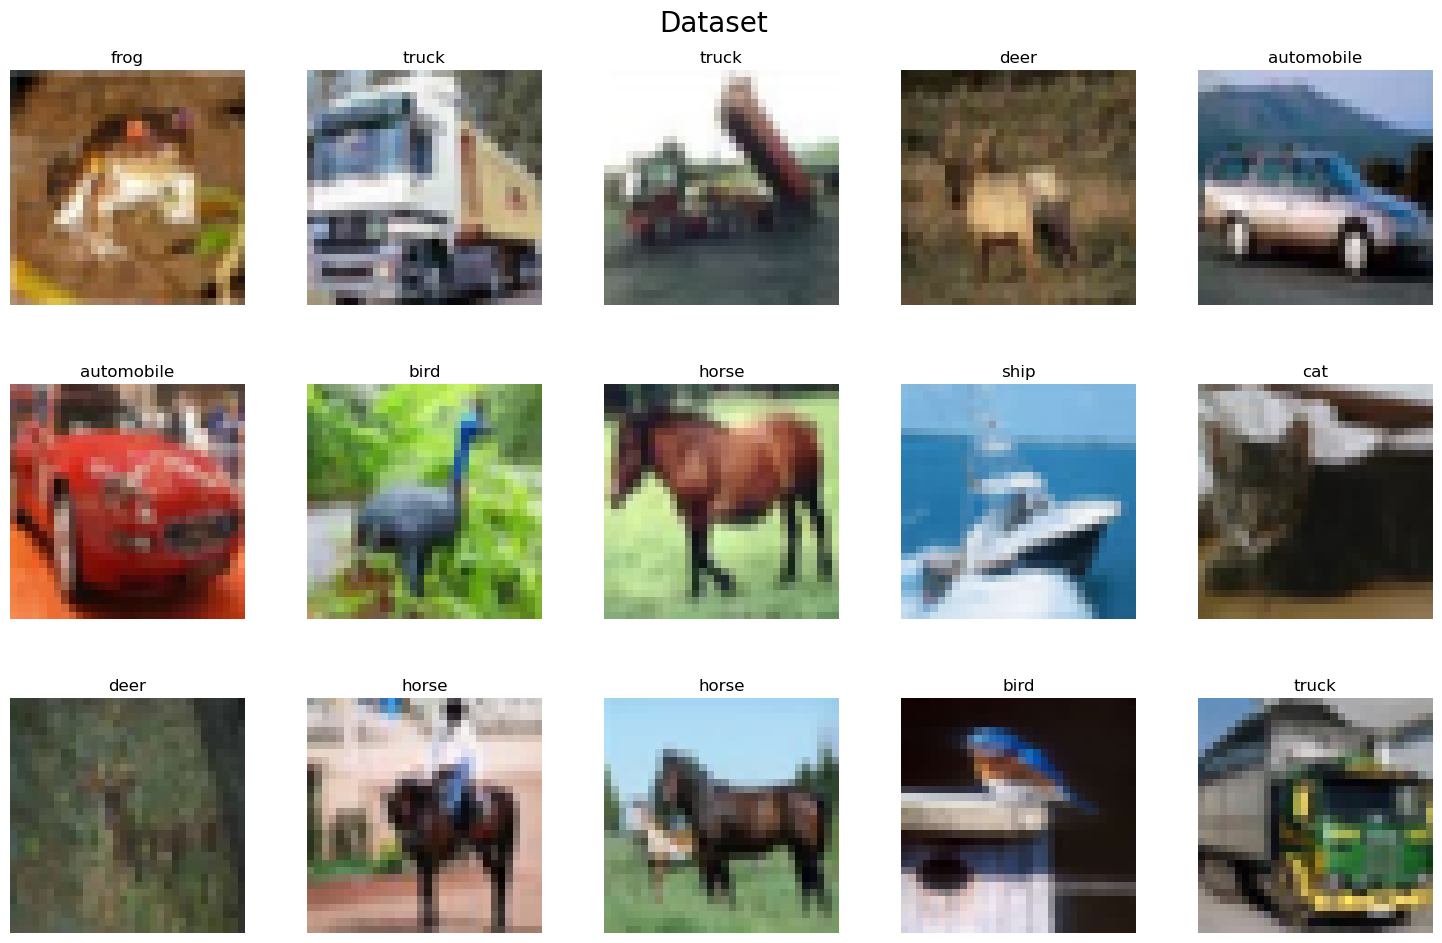

In [132]:
plotData()

In [133]:
# Normalizing the data within a scale of 0-1.

X_train = X_train / 255.0
X_test = X_test / 255.0

In [134]:
# Constructing a CNN model for classification.

CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [135]:
# Compiling the model with adam optimizer.

CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [136]:
# Training the data.

CNN.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 45s 28ms/step - loss: 1.4652 - accuracy: 0.4730
Epoch 2/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1242 - accuracy: 0.6048
Epoch 3/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9886 - accuracy: 0.6552
Epoch 4/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9000 - accuracy: 0.6848
Epoch 5/20
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8302 - accuracy: 0.7100
Epoch 6/20
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7699 - accuracy: 0.7301
Epoch 7/20
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7189 - accuracy: 0.7505
Epoch 8/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6720 - accuracy: 0.7653
Epoch 9/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6279 - accuracy: 0.7798
Epoch 10/20
1563/1563 [==============================] - 41s 26m

In [137]:
# Printing the model summary.

CNN.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [138]:
# Evaluating the data on test set.

CNN.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3255 - accuracy: 0.6814


[1.3254855871200562, 0.6814000010490417]

In [139]:
# Models predection on the test set.

labelPredicted = cnn.predict(X_test)
# y_pred[:5]

313/313 [==============================] - 2s 5ms/step


In [140]:
# Our predection will be probability of each of the 10 classes of labels.

print(f"Shape of Y: {labelPredicted.shape}")
# y_pred[0]

Shape of Y: (10000, 10)


In [141]:
# Computing max element from all the 10 which will be our label predicted.

y_predicted = [np.argmax(element) for element in labelPredicted]
y_predicted = np.array(y_predicted)

In [142]:
# Printing the starting 10 predicted and actual labels.

print(f"\nPredicted starting 10 labels: {y_predicted[:10]}")
print(f"\nActual starting 10 labels:    {y_test[:10]}")


Predicted starting 10 labels: [3 8 8 8 6 6 5 6 5 1]

Actual starting 10 labels:    [3 8 8 0 6 6 1 6 3 1]


In [143]:
# Function that plots the predicted and actual value along with image.

def plotPredicted():
    fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(15, 15))

    fig.suptitle('Predicted, Actual', fontsize = 30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)        

    for i in range(5):

        for j in range(5):

            count = i*5 + j 
            axes[i,j].imshow(X_test[count])
            axes[i,j].axis('off')
            axes[i,j].title.set_text(classes[y_predicted[count]] + ' , ' + classes[y_test[count]])


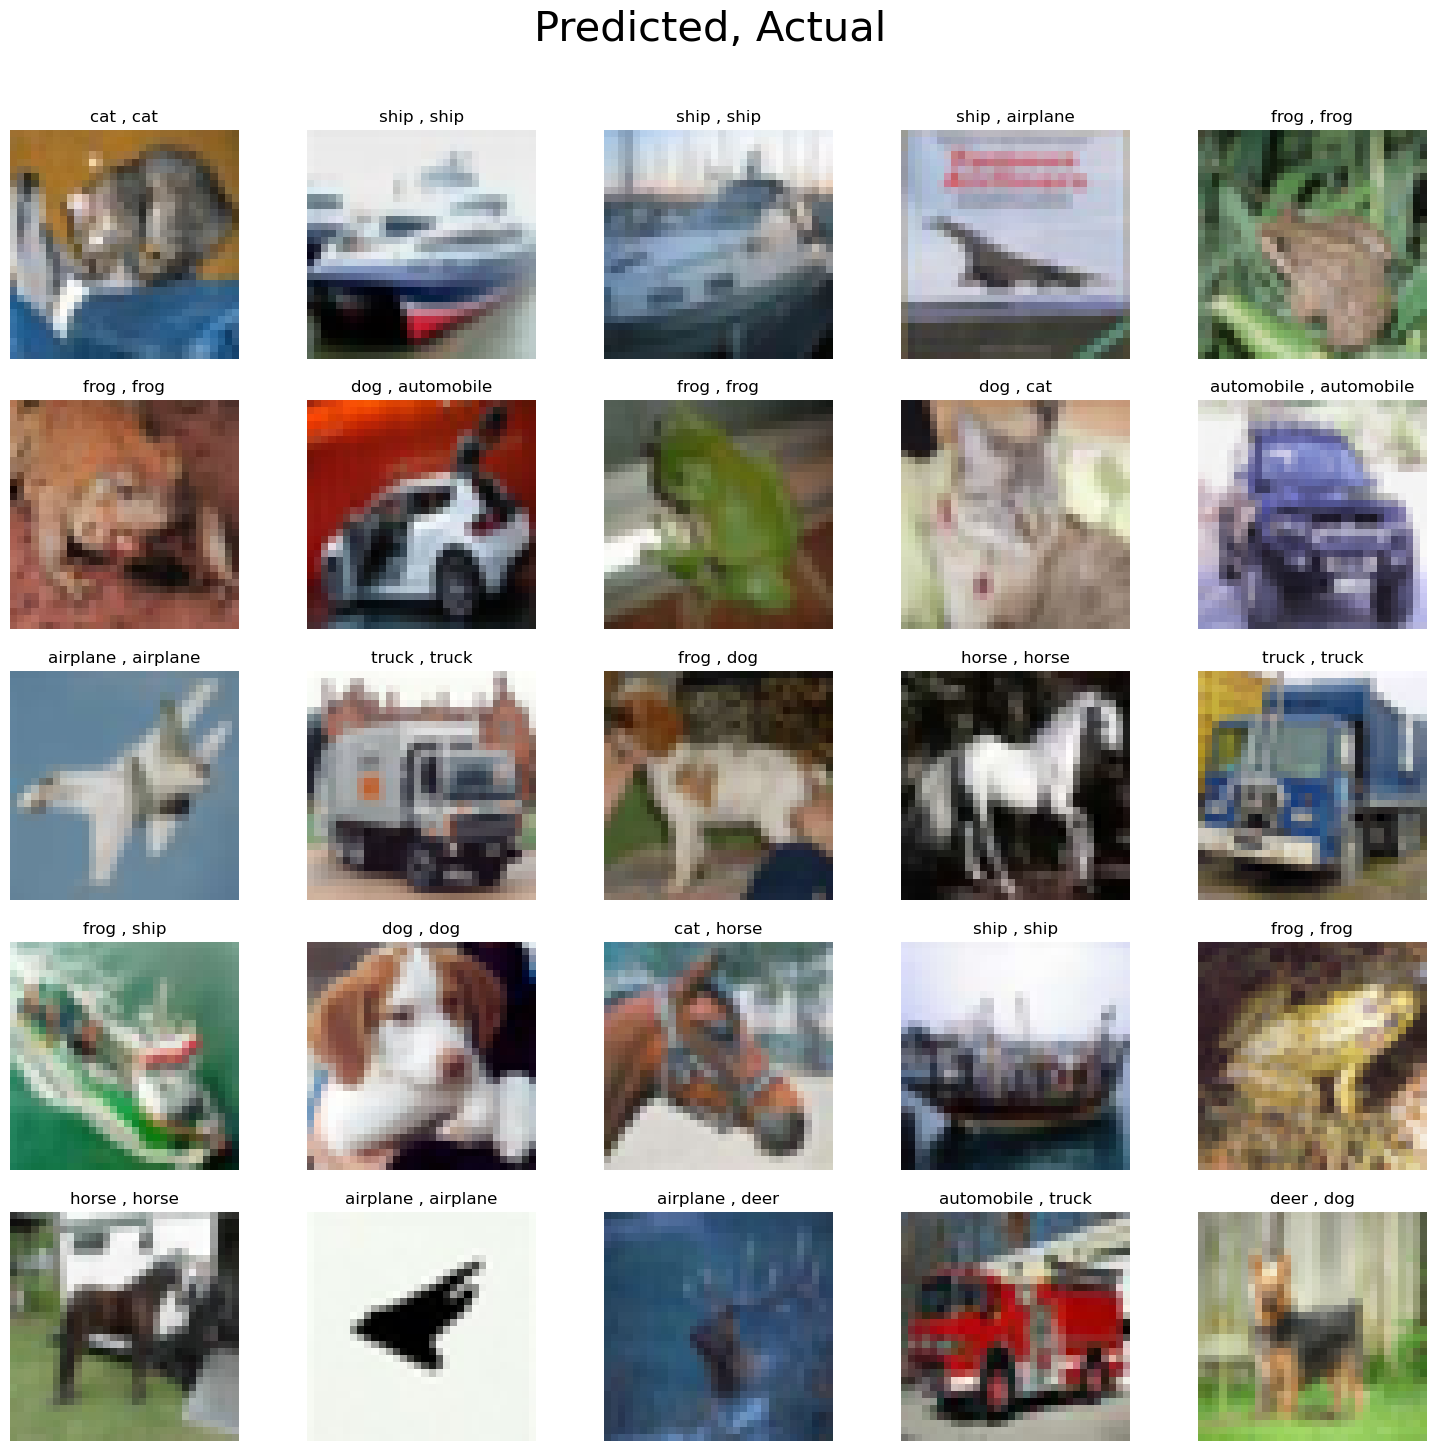

In [144]:
plotPredicted()

<AxesSubplot:title={'center':'Confusion Matrix'}>

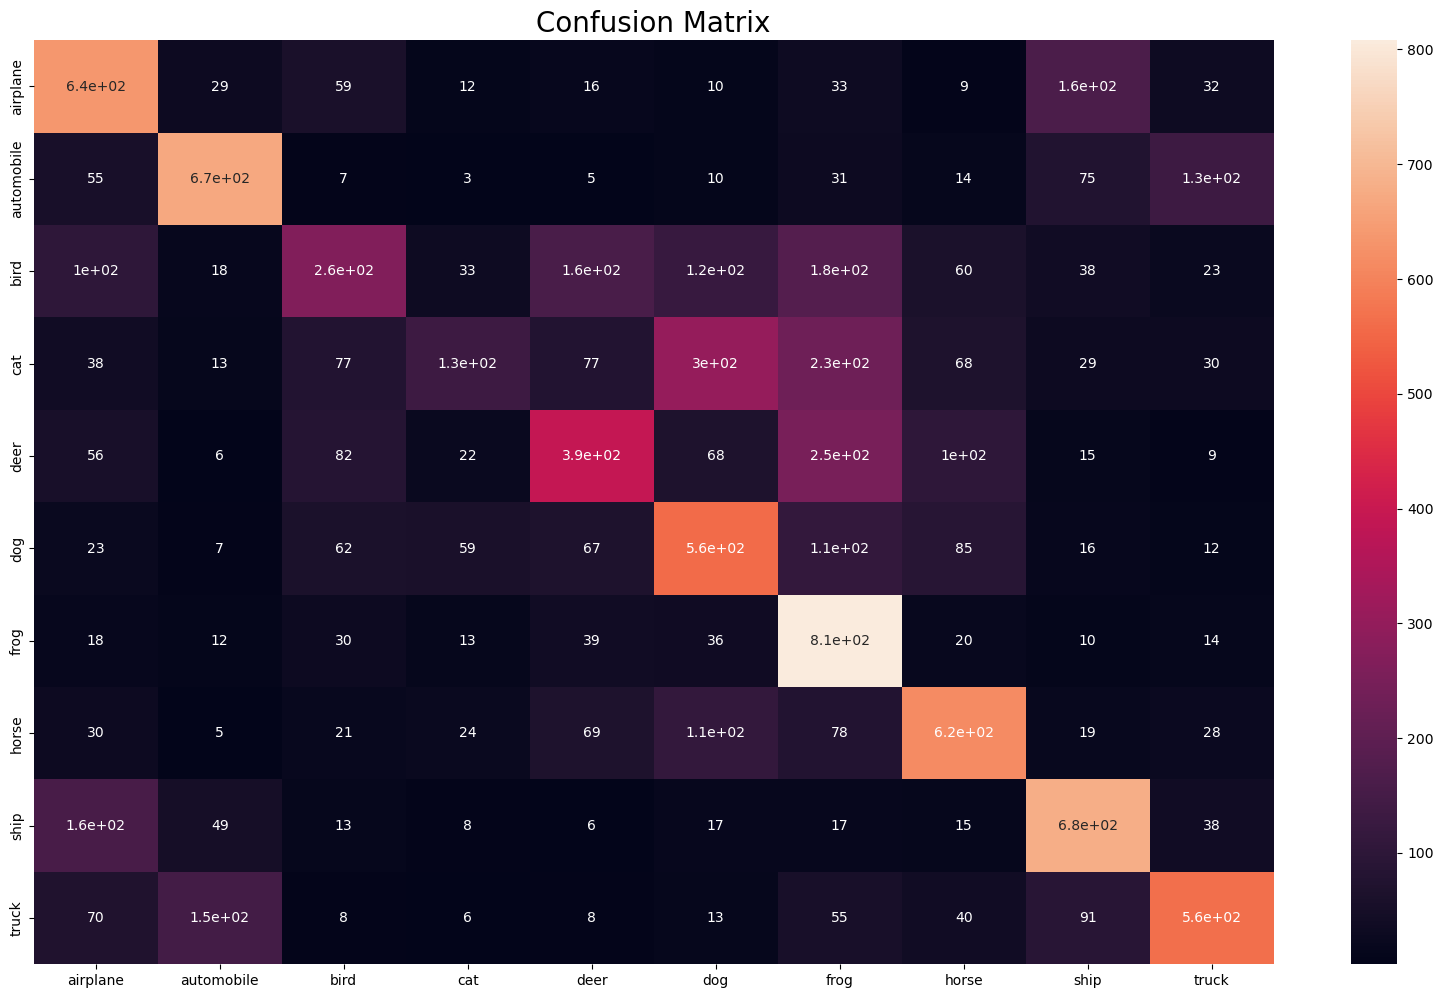

In [145]:
# Confusion Matrix.

confusionMatrix = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(20,12))
plt.title('Confusion Matrix', fontsize = 20)
sns.heatmap(confusionMatrix, annot=True,  xticklabels=classes, yticklabels = classes)

# Now implementing through techniques to improve performance

In [146]:
# Again loading the data set

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [147]:
# Printing the loaded dataset size.

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [148]:
# Saving the 10 classes of data to an array.

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [149]:
# Normalizing the features

X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

print('x_train.shape', X_train.shape)
print('x_test.shape', X_test.shape)

x_train.shape (50000, 32, 32, 3)
x_test.shape (10000, 32, 32, 3)


In [150]:
# One-hot encode labels

y_train_mapped = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_mapped = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# Printing the mapped Y

# print('y_train.shape', y_train_mapped.shape)
# print(y_train_mapped[:3])

In [152]:
# Function that visualizes the dataset.

def plotData():
    fig, axes = plt.subplots(nrows= 3, ncols=5, figsize=(15, 10))

    fig.suptitle('Dataset', fontsize = 20)
    fig.tight_layout()

    for i in range(3):
        for j in range(5):
            count = i*5 + j + 25
            axes[i,j].imshow(np.clip(X_train[count], 0, 1))
            axes[i,j].axis('off')
            axes[i,j].title.set_text(classes[y_train[count, 0]])        


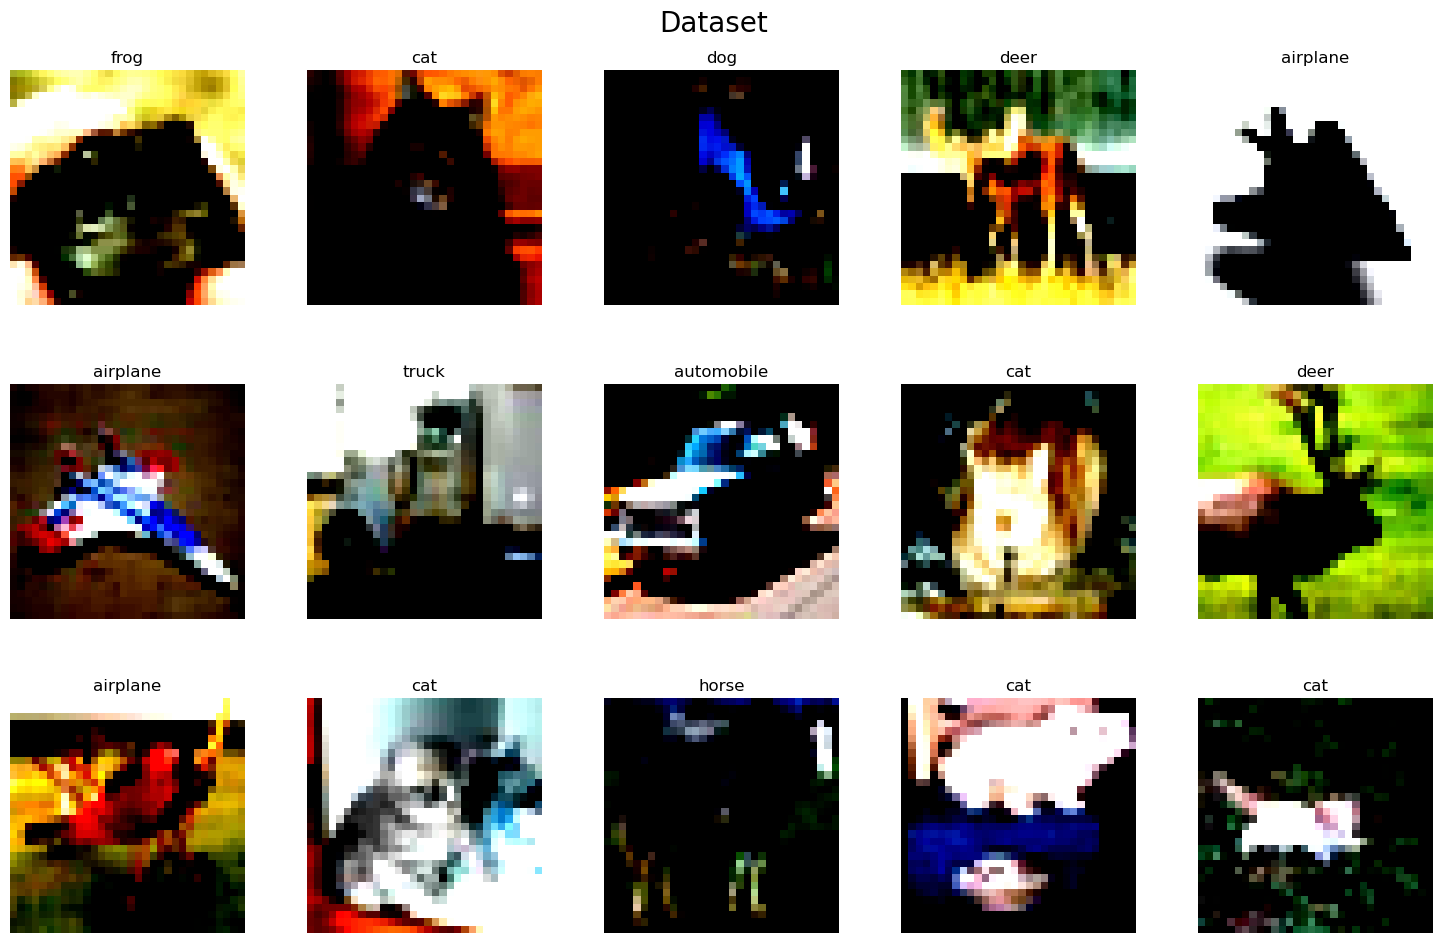

In [153]:
plotData()

In [154]:
# CNN Architecture.

model = tf.keras.Sequential()
model.add(InputLayer(input_shape=[32, 32, 3]))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='elu', use_bias=False))
model.add(BatchNormalization())   # leave default axis=-1 in all BN layers
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='elu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='elu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 16)        432       
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        4608      
                                                                 
 batch_normalization_16 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

In [155]:
# Training data on the data.

hist = model.fit(x=X_train, y=y_train_mapped, batch_size=256, epochs=20, validation_data=[X_test, y_test_mapped], verbose=2)

Epoch 1/20
196/196 - 70s - loss: 1.6903 - accuracy: 0.4422 - val_loss: 1.3813 - val_accuracy: 0.5018 - 70s/epoch - 359ms/step
Epoch 2/20
196/196 - 36s - loss: 1.1912 - accuracy: 0.5843 - val_loss: 1.0021 - val_accuracy: 0.6445 - 36s/epoch - 184ms/step
Epoch 3/20
196/196 - 38s - loss: 1.0228 - accuracy: 0.6393 - val_loss: 0.9072 - val_accuracy: 0.6771 - 38s/epoch - 192ms/step
Epoch 4/20
196/196 - 35s - loss: 0.9075 - accuracy: 0.6819 - val_loss: 0.8259 - val_accuracy: 0.7140 - 35s/epoch - 181ms/step
Epoch 5/20
196/196 - 36s - loss: 0.8303 - accuracy: 0.7074 - val_loss: 0.7887 - val_accuracy: 0.7242 - 36s/epoch - 185ms/step
Epoch 6/20
196/196 - 32s - loss: 0.7687 - accuracy: 0.7273 - val_loss: 0.7803 - val_accuracy: 0.7306 - 32s/epoch - 163ms/step
Epoch 7/20
196/196 - 38s - loss: 0.7179 - accuracy: 0.7469 - val_loss: 0.7140 - val_accuracy: 0.7507 - 38s/epoch - 193ms/step
Epoch 8/20
196/196 - 31s - loss: 0.6722 - accuracy: 0.7632 - val_loss: 0.7361 - val_accuracy: 0.7437 - 31s/epoch - 156

In [156]:
# Evaluation of data on test and training set.

loss, acc = model.evaluate(X_train, y_train_mapped, batch_size=256, verbose=0)
print(f'Accuracy on train set: {acc*100:.3f} % ')
loss, acc = model.evaluate(X_test, y_test_mapped, batch_size=256, verbose=0)
print(f'Accuracy on test set:  {acc*100:.3f} % ')

Accuracy on train set: 95.834 % 
Accuracy on test set:  77.770 % 


In [157]:
labelPredictedByModel = model.predict(X_test)

313/313 [==============================] - 3s 7ms/step


In [158]:
print(f"Shape of Y: {labelPredictedByModel.shape}")

Shape of Y: (10000, 10)


In [159]:
# Getting the max probability index of the 10 classes.

predicted_Y = [np.argmax(element) for element in labelPredictedByModel]
predicted_Y = np.array(predicted_Y)

In [164]:
# Printing the starting 20 predicted and actual labels.

y_test = y_test.reshape(-1,)

print(f"\nPredicted starting 10 labels: {predicted_Y[:20]}")
print(f"\nActual starting 10 labels:    {y_test[:20]}")


Predicted starting 10 labels: [3 8 8 0 4 6 3 6 3 9 0 9 5 7 9 8 5 7 8 6]

Actual starting 10 labels:    [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


In [171]:
# Function that plots the predicted and actual value along with image.

def plotPredicted():
    fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(15, 15))

    fig.suptitle('Predicted, Actual', fontsize = 30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)        

    for i in range(5):

        for j in range(5):

            count = i*5 + j + 25 
            axes[i,j].imshow(np.clip(X_test[count], 0, 1))
            axes[i,j].axis('off')
            axes[i,j].title.set_text(classes[predicted_Y[count]] + ' , ' + classes[y_test[count]])


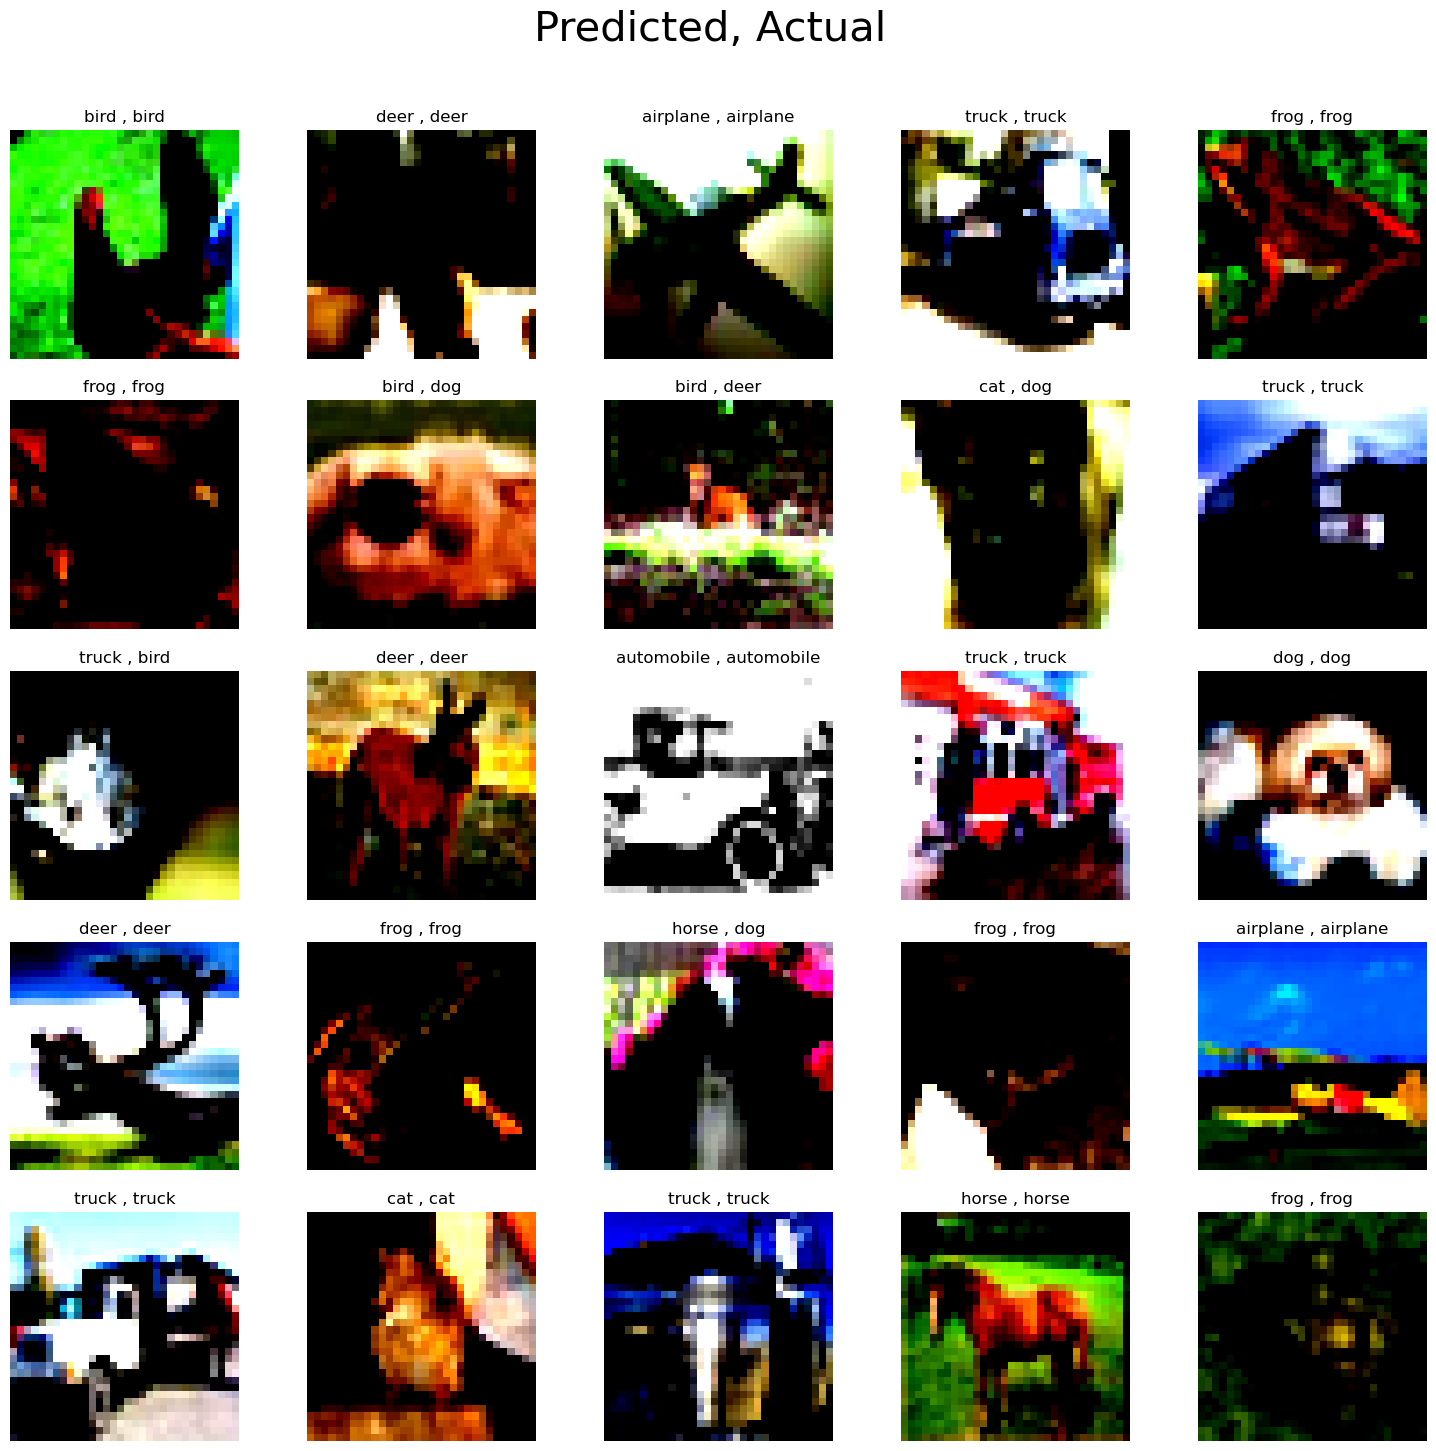

In [172]:
plotPredicted()

<AxesSubplot:title={'center':'Confusion Matrix'}>

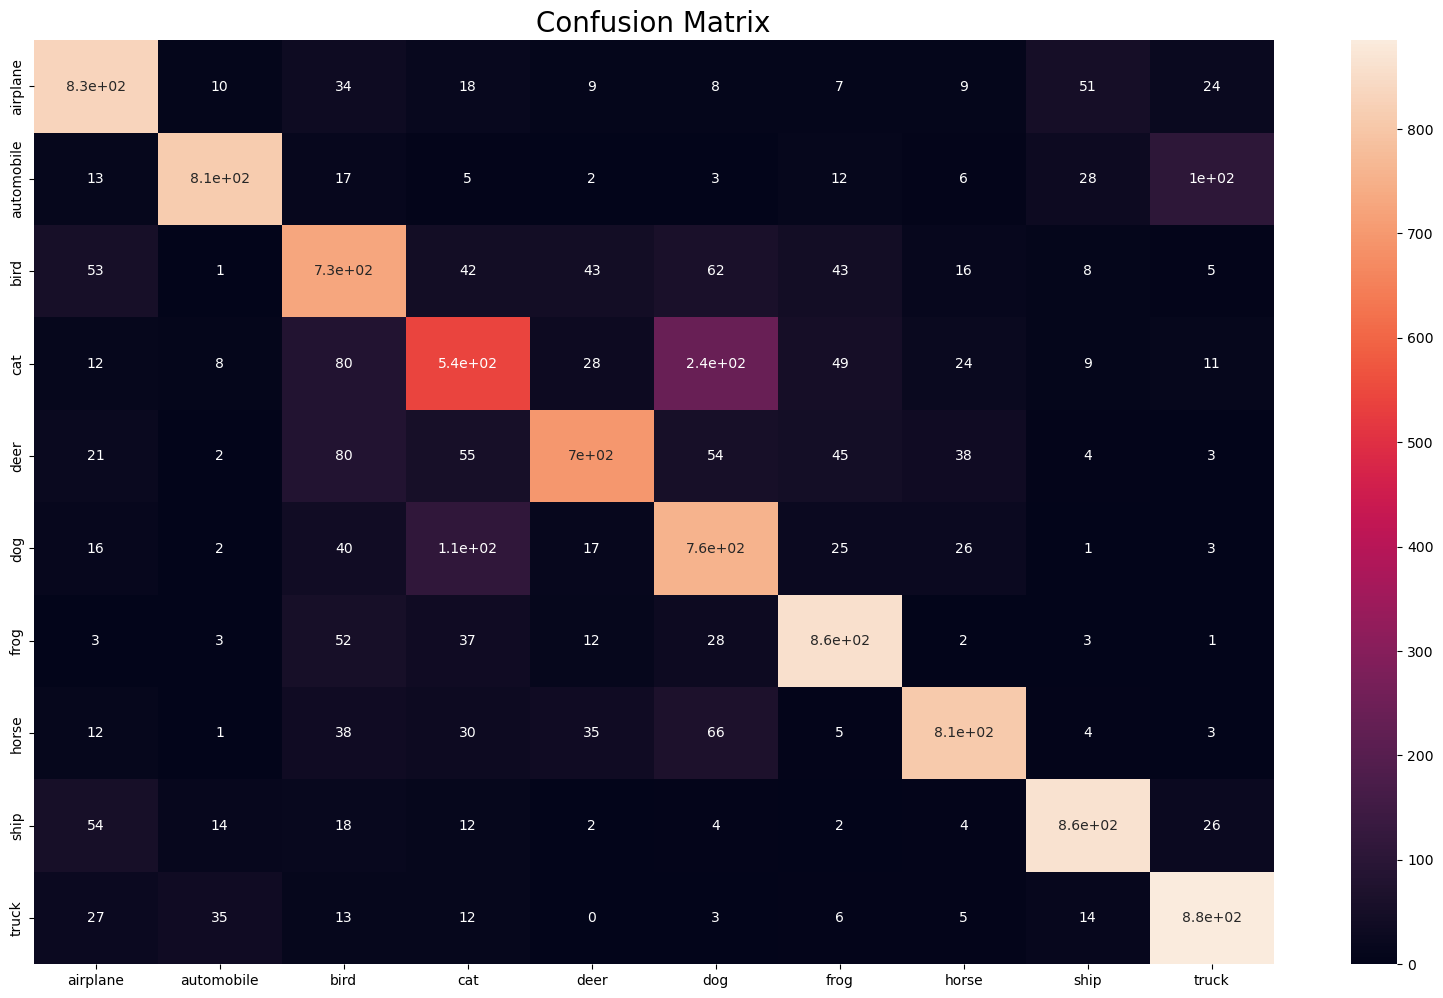

In [173]:
# Confusion Matrix.

confusionMatrix = confusion_matrix(y_test,predicted_Y)

plt.figure(figsize=(20,12))
plt.title('Confusion Matrix', fontsize = 20)
sns.heatmap(confusionMatrix, annot=True,  xticklabels=classes, yticklabels = classes)